# EDUCATIONAL DATA MINING. CASE OF STUDY ON ENEM DATABASE 2019
## RIAN LOPES

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 28 17:50:42 2021

@author: rian.lopes
"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import time

### OBTAINING DATA

In [2]:
############ CREATE DATAFRAME RESULTS

results = pd.DataFrame(columns=['Algoritmo','RMSE','MAE','R^2'])

# UPLOAD THE DATA BASE LINK https://download.inep.gov.br/microdados/microdados_enem_2019.zip
#UPLOAD OF FEW ROWS IN ORDER TO ANALYSE DATA AND SELECT FEATURES
db_select = pd.read_csv('MICRODADOS_ENEM_2019.CSV',sep=';',decimal=',',encoding='latin1', nrows=100)


############ FEATURE SELECTION BASED ON RELAVENCE, DUPLICATE OR UNIVARIATE DATA
irrel = [      
    
        'NU_INSCRICAO','NU_ANO',\
        'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT',\
        'TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT',\
         
        'CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT',\
           
        'NU_NOTA_COMP1','NU_NOTA_COMP2',\
        'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',\
            
        'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',\
                   
        'CO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','CO_MUNICIPIO_NASCIMENTO',\
        'CO_UF_NASCIMENTO','NO_MUNICIPIO_ESC','CO_UF_ESC','CO_MUNICIPIO_PROVA',\
        'CO_UF_PROVA',\
        
        ]
    
#DROPPING NOT RELAVANT FEATURES
db_select = db_select.drop(irrel,axis=1)

#SELECTING FEATURES
cols_select = db_select.columns

##UPLOAD DATABASE WITH IMPONTANT FEATURES ONLY
start = time.time()
db_tt0 = pd.read_csv('MICRODADOS_ENEM_2019.CSV',sep=';',decimal=',',encoding='latin1',\
                     usecols=cols_select, nrows=100000)
print('Database uploaded')
end = time.time()
print(end - start)
print("")

Database uploaded
1.2494635581970215



### DATA WRANGLING

In [3]:
#DROPPING UNIVARIATE COLUMNS
for col in db_tt0.columns:
    if len(db_tt0[col].value_counts())<=1:
        db_tt0 = db_tt0.drop([col],axis=1)
        

##NAN ANALYSIS
# for col in db_tt0:
#     print(col)
#     print(db_tt0[col].isna().sum())
#     print("")

##NAN SCHOOL DATA RATIO
# db_tt0['CO_MUNICIPIO_ESC'].isna().sum()/len(db_tt0.index)


##DROPPING NAN SCHOOL DATA
####################################################  WRANGLING CHECKPOINT 1
db_tt1 = db_tt0.copy()
db_tt1 = db_tt1[db_tt1['CO_MUNICIPIO_ESC'].notna()]

# DROPPING UNIVARIATE COLUMNS
for col in db_tt1.columns:
    if len(db_tt1[col].value_counts())<=1:
        db_tt1 = db_tt1.drop([col],axis=1)

cols_tt1 = db_tt1.columns

##CHECKING CLASSES PROPORTIONS BY COLUMN
# for col in db_tt1:
#     print('')
#     if len(db_tt1[col].value_counts())>5:
#         pass
#     else:
#         print(col)
#         print(db_tt1[col].value_counts())
        

####################################################  WRANGLING CHECKPOINT 2
db_tt2 = db_tt1.copy()


#### CREATING TARGET VARIABLE AND DROPPING OTHERS GRADES
db_tt2['NU_NOTA_REDACAO'] = pd.to_numeric(db_tt2['NU_NOTA_REDACAO'])

db_tt2['NOTA_REDACAO'] = db_tt2.NU_NOTA_REDACAO

db_tt2 = db_tt2.drop(['NU_NOTA_REDACAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',\
                      'NU_NOTA_MT','NU_NOTA_REDACAO','TP_STATUS_REDACAO'],axis=1)
   
## CONFIGURATION 0          ############(COMMENT ALL CONFIGS BELOW TO TEST CONFIG 0)
#cols_tt2 = db_tt2.columns

In [4]:
############ UNCOMMENT ONE OF THE CONFIGS BELOW IN ORDER TO TEST IT
## SELECTING SPECIAL REQUESTS -           CONFIG 1 ############
# cols = db_tt1.columns

# desp = db_tt1[['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
#         'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
#         'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR',
#         'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_SEM_RECURSO',
#         'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR',
#         'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL',
#         'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
#         'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_CADEIRA_ACOLCHOADA',
#         'IN_NOME_SOCIAL']]
## DROPPING SPECIAL REQUESTS 
# db_tt2 = db_tt1.copy()
# db_tt2 = db_tt2.drop(desp.columns,axis=1)
################################################################


## CREATING SPECIAL REQUIREMENTS COLUMN - CONFIG 2 #############
# soliSoma = desp.sum(axis=1)
# soliSoma = pd.DataFrame(soliSoma, columns=['Pedidos'])

# solicitantes = len(soliSoma[soliSoma['Pedidos']!=0])
# naoSolicitantes = len(soliSoma[soliSoma['Pedidos']==0])

# despPlot = pd.DataFrame(data=[solicitantes,naoSolicitantes], \
#     index=["Solicitantes","Não solicitantes"],columns=["Quantidade"])

# # ###PLOTTING PROPORTION OF SPECIAL REQUIREMENTS
# # # despPlotFig = sns.barplot(data=despPlot, x=despPlot.index, y='Quantidade')
# # # fig0 = despPlotFig.get_figure()
# # # fig0.savefig("desproporcaoSolicitantes.png")

# db_tt2 = db_tt1.copy()
# db_tt2['SOLICITACOES_ESPEC'] = soliSoma.Pedidos
# db_tt2 = db_tt2.drop(desp.columns,axis=1)
################################################################


## DROPING GRADE 0 FROM TARGET VARIABLE (IF IT HAS) - CONFIG 3 #
##  - CONFIG 3
# db_tt2 = db_tt2[db_tt2['NOTA_REDACAO']>0]
################################################################

In [5]:

### DROPPING UNIVARIATE COLUMNS
for col in db_tt2.columns:
    if len(db_tt2[col].value_counts())<=1:
        db_tt2 = db_tt2.drop([col],axis=1)
################################################################


##  NAN VALUES 
# for col in db_tt2:
#     print(col)
#     print(db_tt2[col].isna().sum())
#     print("")

###DROPING NAN VALUES BY TARGET VARIABLE
db_tt2 = db_tt2[db_tt2['NOTA_REDACAO'].notna()]

# db_tt2.dtypes
# head = db_tt2.head()

####################################################  WRANGLING CHECKPOINT 3
db_tt3 = db_tt2.copy()

#### TREATING THE REMAINING NAN VALUES

for col in db_tt3.columns:    
    if(db_tt3[col].dtype == np.float64 or db_tt3[col].dtype == np.int64):
        db_tt3[col] = db_tt3[col].fillna(0)            
    else:
        db_tt3[col] = db_tt3[col].fillna('NI') 

head = db_tt3.head()

## CHECK NAN
# db_tt3.isnull().all()

## DROPPING UNIVARIATE COLUMNS
for col in db_tt3.columns:
    if len(db_tt3[col].value_counts())<=1:
        db_tt3 = db_tt3.drop([col],axis=1)

##PLOT TARGET VARIABLE HISTOGRAM AFTER WRANGLING
# db_tt3.NOTA_REDACAO.hist()

####CREATING LABELS AND COVERTING COLUMNS TYPES
# db_tt3.dtypes
le = LabelEncoder()

for col in db_tt3.columns:    
    if(db_tt3[col].dtype == np.object):
        le.fit(db_tt3[col].unique())
        db_tt3[col] = le.transform(db_tt3[col])

## SAVE DATABASE AFTER WRANGLING
# db_tt3.to_csv('config0_database',index=False)

####################################################  WRANGLING CHECKPOINT SPLIT
db_bsplit = db_tt3.copy()
cols = db_bsplit.columns

##CHECK TYPES
# db_bsplit.dtypes

###### TARGET VARIABLE STATS

In [6]:
# db_tt3.NOTA_REDACAO.mean()
# db_tt3.NOTA_REDACAO.std()
# db_tt3.NOTA_REDACAO.kurt()
# db_tt3.NOTA_REDACAO.skew()

###### STANDARDIZATION

In [7]:
###- NORMALIZATION (MLP AND LINEAR REGRESSION AFFECTED)
# from sklearn.preprocessing import StandardScaler

# padr = StandardScaler()

# db_bstd = db_bsplit.copy()

# db_bstd = pd.DataFrame(padr.fit_transform(db_bstd))

# db_bstd.columns = db_bsplit.columns

# db_bsplit = db_bstd.copy()

##- MIN MAX
from sklearn.preprocessing import MinMaxScaler

padr = MinMaxScaler()

db_bstd = db_bsplit.copy()

db_bstd = pd.DataFrame(padr.fit_transform(db_bstd))

db_bstd.columns = db_bsplit.columns

db_bsplit = db_bstd.copy()


In [8]:
###### PLOT TARGET VARIABLE DISTRIBUTION
# fig, ax =plt.subplots(1,2,figsize=(10,6))
# sns.distplot(db_tt3.NOTA_REDACAO, bins=40,ax=ax[0], color='lightseagreen')
# sns.boxplot(data = db_tt3, y='NOTA_REDACAO',orient='v',ax=ax[1], color='crimson')
# plt.savefig("distribuicaoTarget.png")

### SPLIT, TRAINING, TESTING

In [9]:

X_train, X_test, y_train, y_test = train_test_split(db_bsplit.iloc[:,db_bsplit.columns!='NOTA_REDACAO'],\
                                                    db_bsplit['NOTA_REDACAO'], test_size=0.3, random_state=99)


In [10]:
######## DIMENSIONALITY REDUCTION(OPTIONAL)
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import MinMaxScaler

# aPCA  = PCA(n_components=30)

# modelPCA = aPCA.fit(X_train)

# X_train = modelPCA.transform(X_train)
# X_test = modelPCA.transform(X_test)

# padr = MinMaxScaler()

# X_train = pd.DataFrame(padr.fit_transform(X_train))
# X_test = pd.DataFrame(padr.fit_transform(X_test))
# y_train = pd.DataFrame(padr.fit_transform(np.array(y_train).reshape(-1, 1)), columns=['NOTA_REDACAO'])
# y_test = pd.DataFrame(padr.fit_transform(np.array(y_test).reshape(-1, 1)), columns=['NOTA_REDACAO'])
#######################################

######## FEATURE SELECTION (OPTIONAL)   
# from sklearn.feature_selection import SelectPercentile, f_regression
    
# X_new = SelectPercentile(f_regression, percentile=60).fit(X_train,y_train)

# X_train = X_train.loc[:,X_new.get_support()]
# X_test = X_test.loc[:,X_new.get_support()]

# cols_fs = X_train.columns
# np.setdiff1d(cols,cols_fs)
#######################################
    
######## K-FOLD CROSS VALIDATION (OPTIONAL)  
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsRegressor

# kf = KFold(n_splits=3)
# modelKNN = KNeighborsRegressor()
# scores = cross_val_score(modelKNN, db_bsplit.loc[:,db_bsplit.columns!='NOTA_REDACAO'], \
#            db_bsplit.loc[:,db_bsplit.columns=='NOTA_REDACAO'], cv=kf,scoring='r2')



###### LINEAR REGRESSION

In [11]:
# ##########################    LINEAR REGRESSION     ######################################
from sklearn.linear_model import LinearRegression

start = time.time()
modelLR = LinearRegression().fit(X_train, y_train)

db_result = pd.concat([y_test.reset_index(drop=True),pd.DataFrame(modelLR.predict(X_test), columns=['Prev_LR'])],axis=1)

LRrmse = sqrt(mean_squared_error(db_result.NOTA_REDACAO,db_result.Prev_LR))
LRmae = mean_absolute_error(db_result.NOTA_REDACAO,db_result.Prev_LR)
LRr2 = modelLR.score(X_test,y_test)
LRres = pd.DataFrame([['Regressão Linear',LRrmse,LRmae,LRr2]],columns=['Algoritmo','RMSE','MAE','R^2'])

modelLR.get_params()

results = pd.concat([results,LRres])

# melted = db_result[['NOTA_REDACAO','Prev_LR']]
# melted = melted.melt()
# p = sns.displot(melted, x="value", hue="variable", kind="kde")
## p.set(xlim=(-2, 2))
print('Regression ok')
end = time.time()
print(end - start)
print("")

Regression ok
0.08383440971374512



###### RANDOM FOREST

In [12]:
# # ##########################   RANDOM FOREST     ######################################
from sklearn.ensemble import RandomForestRegressor
start = time.time()
modelRF = RandomForestRegressor(n_estimators = 250).fit(X_train, y_train)

db_result = pd.concat([db_result,pd.DataFrame(modelRF.predict(X_test), columns=['Prev_RF'])],axis=1)

RFrmse = sqrt(mean_squared_error(db_result.NOTA_REDACAO,db_result.Prev_RF))
RFmae = mean_absolute_error(db_result.NOTA_REDACAO,db_result.Prev_RF)
RFr2 = modelRF.score(X_test,y_test)
RFres = pd.DataFrame([['Random Forest',RFrmse,RFmae,RFr2]],columns=['Algoritmo','RMSE','MAE','R^2'])

modelRF.get_params()

results = pd.concat([results,RFres])

# ## melted = db_result[['NOTA_REDACAO','Prev_RF']]
# ## melted = melted.melt()
# ## sns.displot(melted, x="value", hue="variable", kind="kde")
print('Random Forest ok')
end = time.time()
print(end - start)
print("")


Random Forest ok
40.54230093955994



###### KNN 

In [13]:
# # ## ##########################   KNN    ######################################
from sklearn.neighbors import KNeighborsRegressor
start = time.time()
modelKNN = KNeighborsRegressor(n_neighbors = 70).fit(X_train, y_train)

db_result = pd.concat([db_result,pd.DataFrame(modelKNN.predict(X_test), columns=['Prev_KNN'])],axis=1)

KNNrmse = sqrt(mean_squared_error(db_result.NOTA_REDACAO,db_result.Prev_KNN))
KNNmae = mean_absolute_error(db_result.NOTA_REDACAO,db_result.Prev_KNN)
KNNr2 = modelKNN.score(X_test,y_test)
KNNres = pd.DataFrame([['KNN',KNNrmse,KNNmae,KNNr2]],columns=['Algoritmo','RMSE','MAE','R^2'])

modelKNN.get_params()

results = pd.concat([results,KNNres])

# # melted = db_result[['NOTA_REDACAO','Prev_KNN']]
# # melted = melted.melt()
# # sns.displot(melted, x="value", hue="variable", kind="kde")
print('KNN ok')
end = time.time()
print(end - start)
print("")

KNN ok
4.278528928756714



###### MLP

In [14]:
# # ##########################   MLP    ######################################
from sklearn.neural_network import MLPRegressor
start = time.time()
modelMLP = MLPRegressor(hidden_layer_sizes = (25)).fit(X_train, y_train)

db_result = pd.concat([db_result,pd.DataFrame(modelMLP.predict(X_test), columns=['Prev_MLP'])],axis=1)

MLPrmse = sqrt(mean_squared_error(db_result.NOTA_REDACAO,db_result.Prev_MLP))
MLPmae = mean_absolute_error(db_result.NOTA_REDACAO,db_result.Prev_MLP)
MLPr2 = modelMLP.score(X_test,y_test)
MLPres = pd.DataFrame([['Rede Neural',MLPrmse,MLPmae,MLPr2]],columns=['Algoritmo','RMSE','MAE','R^2'])

modelMLP.get_params()

results = pd.concat([results,MLPres])

# melted = db_result[['NOTA_REDACAO','Prev_MLP']]
# melted = melted.melt()
# sns.displot(melted, x="value", hue="variable", kind="kde")

print('Neural network ok')
end = time.time()
print(end - start)
print("")

Neural network ok
2.1083571910858154



### RESULTS

In [15]:
########## UNSCALE RESULTS
results_scl = pd.DataFrame(columns=['Algoritmo','RMSE','MAE','R^2'])

invert = MinMaxScaler()
invert.fit(pd.DataFrame(db_tt3.NOTA_REDACAO))
dbresult_inverse = pd.DataFrame(invert.inverse_transform(db_result))
dbresult_inverse.columns = db_result.columns

LRrmse = sqrt(mean_squared_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_LR))
LRmae = mean_absolute_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_LR)
LRr2 = modelLR.score(X_test,y_test)
LRres = pd.DataFrame([['Regressão Linear',LRrmse,LRmae,LRr2]],columns=['Algoritmo','RMSE','MAE','R^2'])
results_scl = pd.concat([results_scl,LRres])

RFrmse = sqrt(mean_squared_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_RF))
RFmae = mean_absolute_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_RF)
RFr2 = modelRF.score(X_test,y_test)
RFres = pd.DataFrame([['Random Forest',RFrmse,RFmae,RFr2]],columns=['Algoritmo','RMSE','MAE','R^2'])
results_scl = pd.concat([results_scl,RFres])

KNNrmse = sqrt(mean_squared_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_KNN))
KNNmae = mean_absolute_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_KNN)
KNNr2 = modelKNN.score(X_test,y_test)
KNNres = pd.DataFrame([['KNN',KNNrmse,KNNmae,KNNr2]],columns=['Algoritmo','RMSE','MAE','R^2'])
results_scl = pd.concat([results_scl,KNNres])

MLPrmse = sqrt(mean_squared_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_MLP))
MLPmae = mean_absolute_error(dbresult_inverse.NOTA_REDACAO,dbresult_inverse.Prev_MLP)
MLPr2 = modelMLP.score(X_test,y_test)
MLPres = pd.DataFrame([['Rede Neural',MLPrmse,MLPmae,MLPr2]],columns=['Algoritmo','RMSE','MAE','R^2'])
results_scl = pd.concat([results_scl,MLPres])

print(results_scl)

          Algoritmo        RMSE         MAE       R^2
0  Regressão Linear  175.681259  127.744730  0.168571
0     Random Forest  172.432196  127.068531  0.199040
0               KNN  180.445530  130.399735  0.122865
0       Rede Neural  178.692054  132.756428  0.139829


### PLOTTING

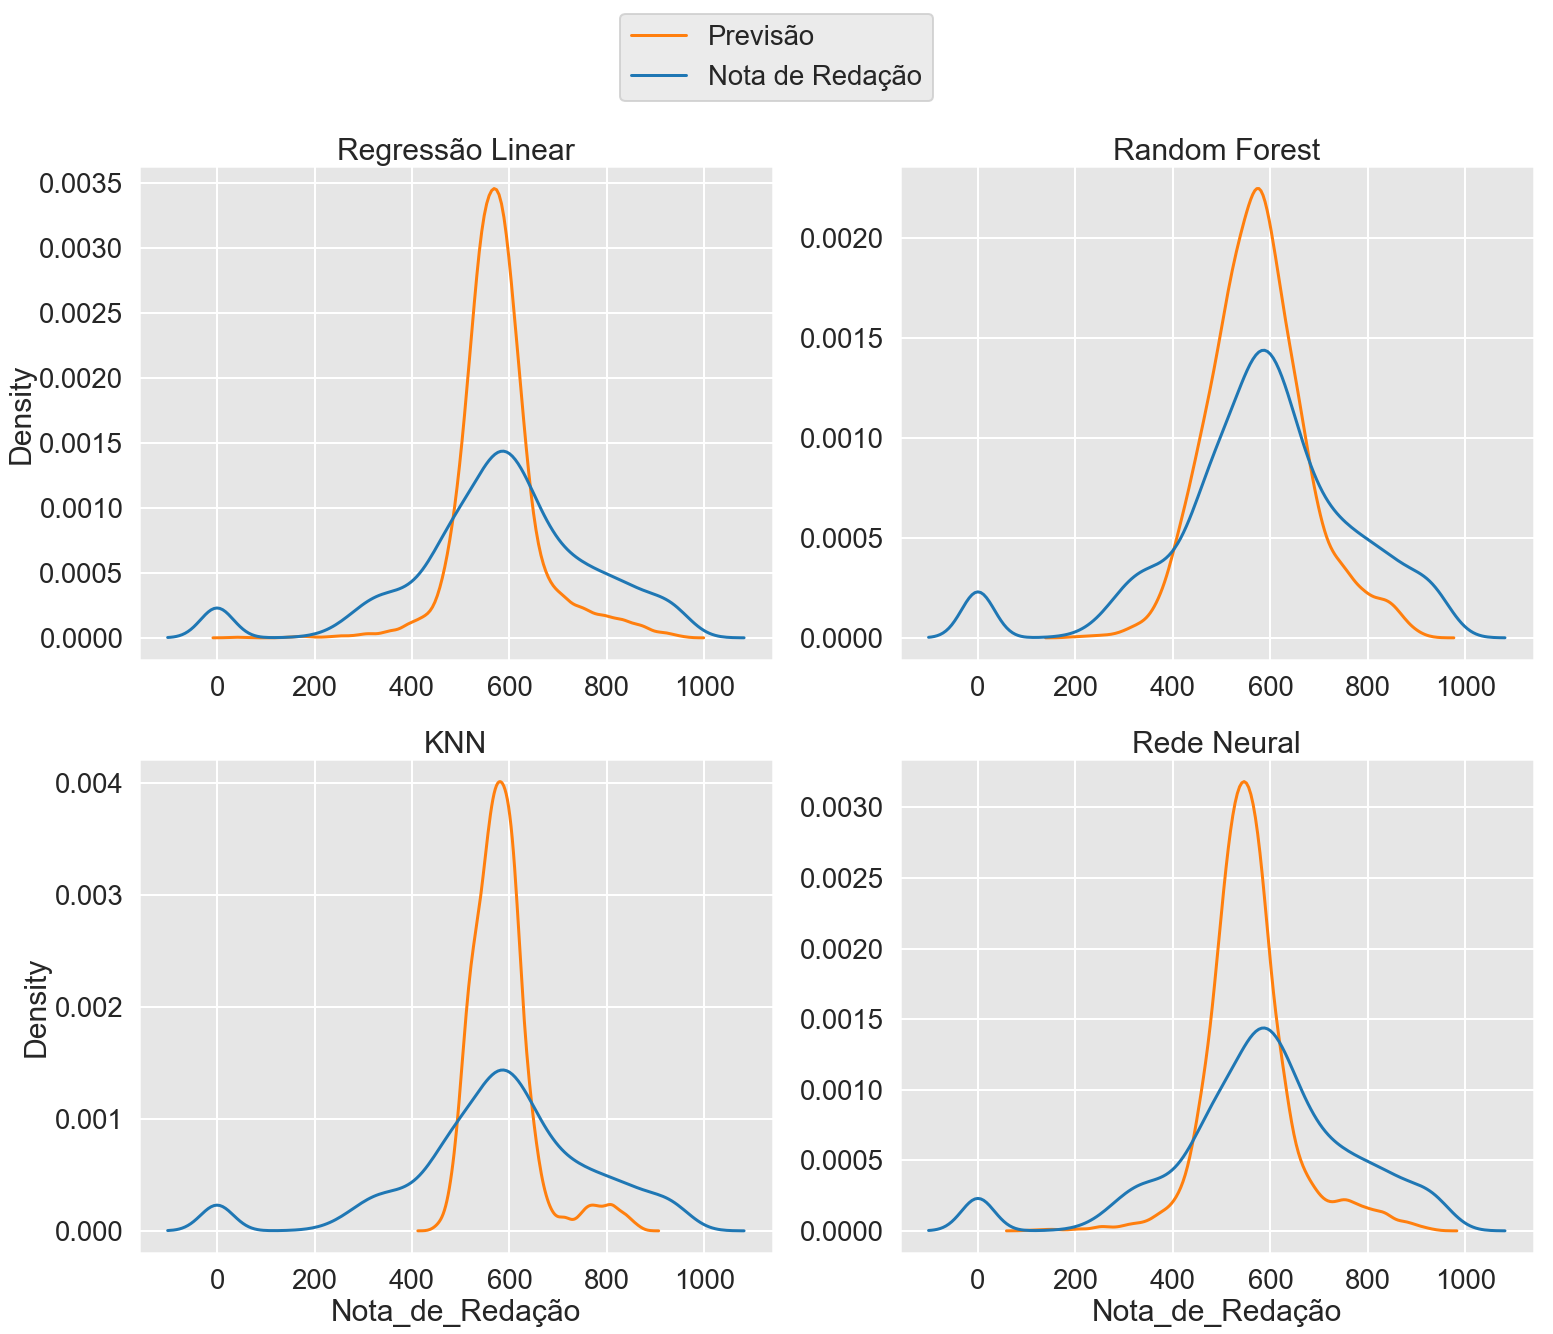

In [16]:
######### KDE PLOTS COMPARISON
sns.set_context("poster",font_scale=1.25)
sns.set_style("darkgrid", {"axes.facecolor":"0.9"})
fig, ax =plt.subplots(2,2,figsize=(25,20))
melted = dbresult_inverse[['NOTA_REDACAO','Prev_LR']]
melted = melted.melt()
melted.columns = ['variable','Nota_de_Redação']
ax0 = sns.kdeplot(data=melted, x='Nota_de_Redação',hue='variable',ax=ax[0,0],legend=False)
ax0.set_title('Regressão Linear')
ax0.set(xlabel=None)
melted = dbresult_inverse[['NOTA_REDACAO','Prev_RF']]
melted = melted.melt()
melted.columns = ['variable','Nota_de_Redação']
ax1 = sns.kdeplot(data=melted, x='Nota_de_Redação',hue='variable',ax=ax[0,1],legend=False)
ax1.set_title('Random Forest')
ax1.set(xlabel=None, ylabel=None)
melted = dbresult_inverse[['NOTA_REDACAO','Prev_KNN']]
melted = melted.melt()
melted.columns = ['variable','Nota_de_Redação']
ax2 = sns.kdeplot(data=melted, x='Nota_de_Redação',hue='variable',ax=ax[1,0],legend=False)
ax2.set_title('KNN')
melted = dbresult_inverse[['NOTA_REDACAO','Prev_MLP']]
melted = melted.melt()
melted.columns = ['variable','Nota_de_Redação']
ax3 = sns.kdeplot(data=melted, x='Nota_de_Redação',hue='variable',ax=ax[1,1],legend=False, label="Variavel")
ax3.set_title('Rede Neural')
ax3.set(ylabel=None)
handles, labels = ax[1,1].get_legend_handles_labels()
fig.legend(handles, ['Previsão', 'Nota de Redação'], loc='upper center')
##SAVE PLOT
# plt.savefig("curvdistALGOKDE_CONFIG3.png")

Text(0.5, 1.0, 'Rede Neural')

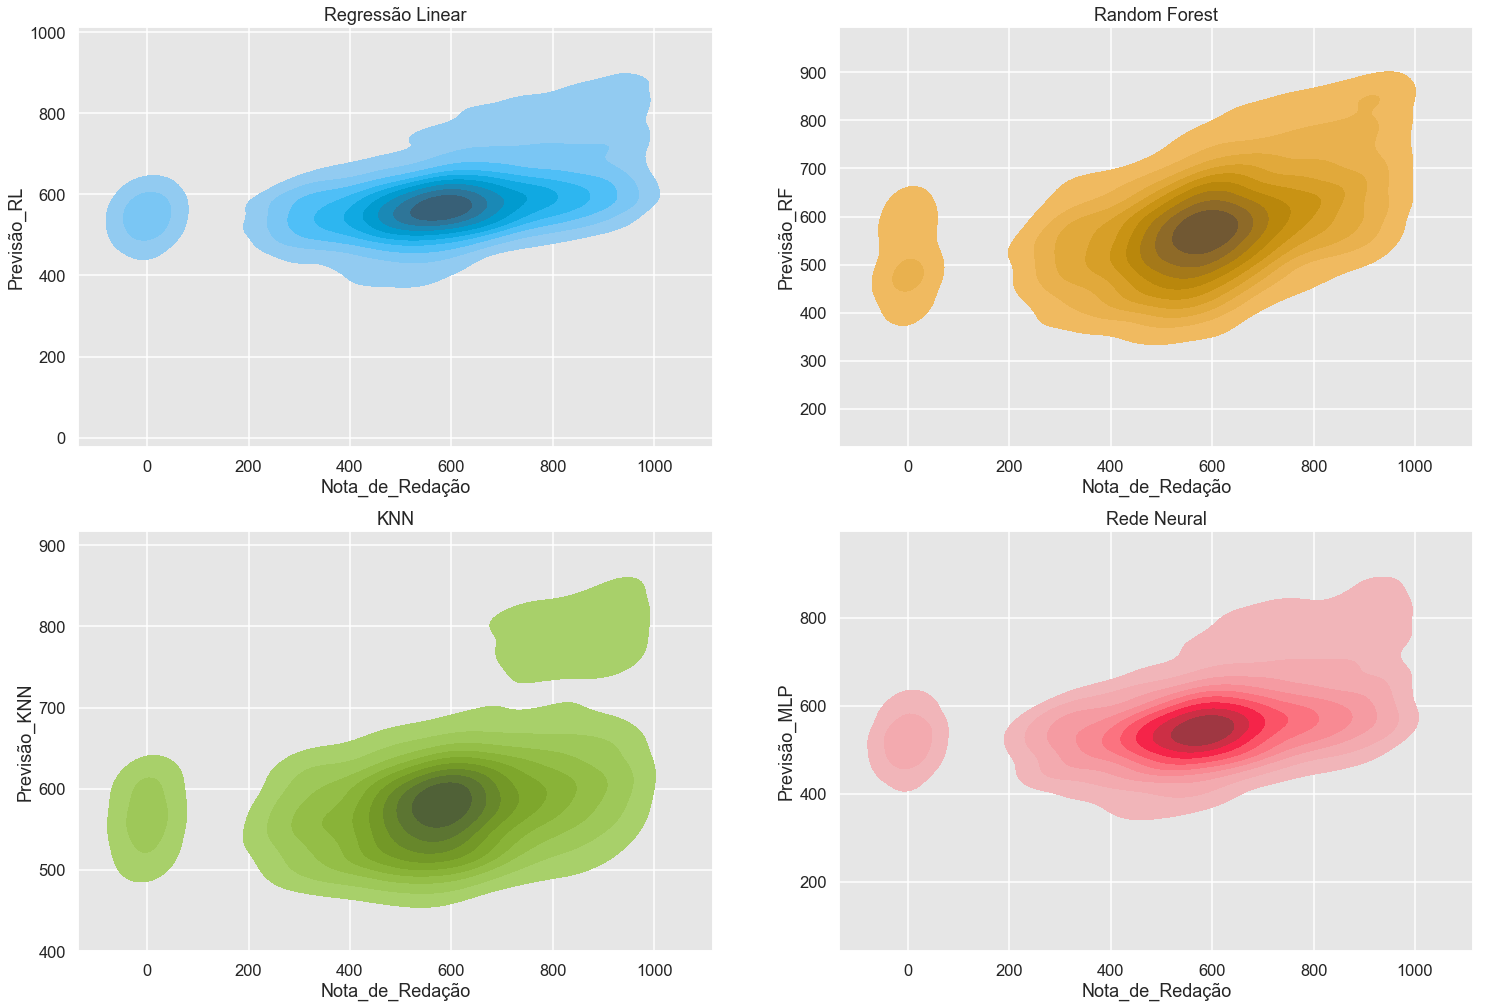

In [17]:
######### BIVARIATE DISTRIBUTION
dbresult_inverse.columns = ['Nota_de_Redação','Previsão_RL', 'Previsão_RF', 'Previsão_KNN', 'Previsão_MLP']
sns.set_context('talk')
sns.set_style("darkgrid", {"axes.facecolor":"0.9"})
fig, ax =plt.subplots(2,2,figsize=(25,17))
ax0 = sns.kdeplot(x=dbresult_inverse.Nota_de_Redação, y=dbresult_inverse.Previsão_RL, fill=True,ax=ax[0,0],color='deepskyblue')
ax0.set_title('Regressão Linear')
ax1 = sns.kdeplot(x=dbresult_inverse.Nota_de_Redação, y=dbresult_inverse.Previsão_RF, fill=True,ax=ax[0,1],color='darkgoldenrod')
ax1.set_title('Random Forest')
ax2 = sns.kdeplot(x=dbresult_inverse.Nota_de_Redação, y=dbresult_inverse.Previsão_KNN, fill=True,ax=ax[1,0],color='olivedrab')
ax2.set_title('KNN')
ax3 = sns.kdeplot(x=dbresult_inverse.Nota_de_Redação, y=dbresult_inverse.Previsão_MLP, fill=True,ax=ax[1,1],color='crimson')
ax3.set_title('Rede Neural')
##SAVE PLOT
# plt.savefig("curvdistALGO_CONFIG3.png")

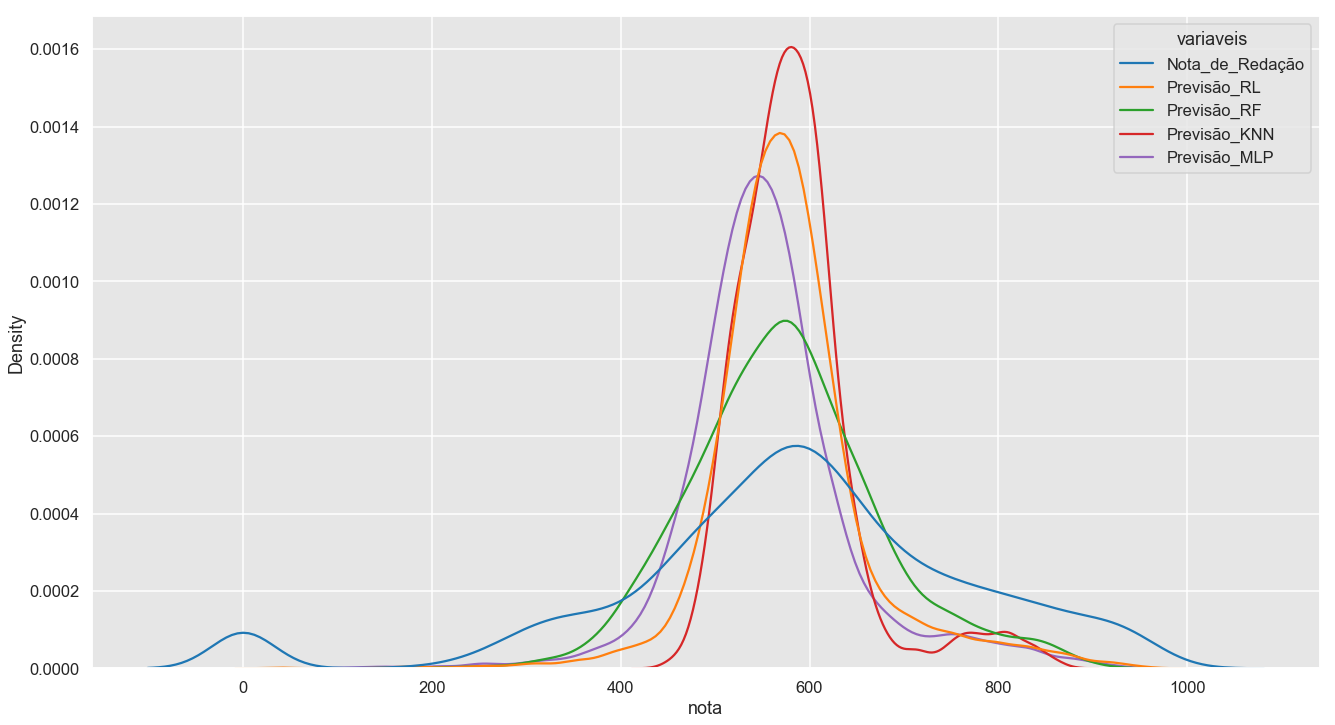

In [18]:
######### DISTRIBUTION CURVE OVERLAID
sns.set_context('talk')
sns.set_style("darkgrid", {"axes.facecolor":"0.9"})
fig_dims = (22,12)
fig, ax = plt.subplots(figsize=fig_dims)
melted = dbresult_inverse
melted = melted.melt()
melted.columns = ['variaveis','nota']
sns_plot = sns.kdeplot(data=melted, x='nota', hue='variaveis', ax=ax)
##SAVE PLOT
# plt.savefig('curvdistribuicaoCONFIG3.png')

### SAVE RESULTS

In [19]:
######### SAVE RESULTS 
# results_scl.to_csv('config3_results_scl',index=False)
# db_result.to_csv('config3_db_result', index=False)
# dbresult_inverse.to_csv('config3_db_results_inverse', index=False)